In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
chipo = pd.read_csv('data/21.09.27(연관분석)/chipotle.csv',sep='\t')

print(type(chipo))
chipo


chipo

<class 'pandas.core.frame.DataFrame'>


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [2]:
cnt=len(chipo['order_id'].unique())+1

df_tmp=chipo[['order_id','item_name']]
df_tmp_arr=[[]for i in range(cnt)]
num=0
for i in df_tmp['item_name'] :
    df_tmp_arr[df_tmp['order_id'][num]].append(i)
    num+=1

In [3]:
df_tmp_arr.pop(0)
num=0
for i in df_tmp_arr :
    df_tmp_arr[num] = list(set(df_tmp_arr[num]))
    num+=1
df_tmp_arr[:5]

[['Nantucket Nectar',
  'Chips and Fresh Tomato Salsa',
  'Chips and Tomatillo-Green Chili Salsa',
  'Izze'],
 ['Chicken Bowl'],
 ['Side of Chips', 'Chicken Bowl'],
 ['Steak Soft Tacos', 'Steak Burrito'],
 ['Chips and Guacamole', 'Steak Burrito']]

In [4]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(df_tmp_arr).transform(df_tmp_arr)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1830,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.083969,(Bottled Water)
1,0.051254,(Canned Soda)
2,0.150491,(Canned Soft Drink)
3,0.335333,(Chicken Bowl)
4,0.266630,(Chicken Burrito)
5,0.053435,(Chicken Salad Bowl)
6,0.058342,(Chicken Soft Tacos)
7,0.113413,(Chips)
8,0.059978,(Chips and Fresh Tomato Salsa)
9,0.258451,(Chips and Guacamole)


In [6]:
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
from glob import glob
dataList=glob('data/21.09.27(연관분석)/*.csv')
dataList

['data/21.09.27(연관분석)\\chipotle.csv',
 'data/21.09.27(연관분석)\\CUST_ORDER_OUTPUT2.utf8.csv',
 'data/21.09.27(연관분석)\\VHD_GOODSKIND.csv']

In [8]:
import pandas as pd
df=pd.read_csv('data/21.09.27(연관분석)/CUST_ORDER_OUTPUT2.utf8.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510470 entries, 0 to 510469
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   CUST_SERIAL_NO  510470 non-null  int64 
 1   SEX             510470 non-null  object
 2   AGE             510470 non-null  object
 3   REG_DATE        510470 non-null  object
 4   ORDER_DATE      510470 non-null  object
 5   ORDER_HOUR      510470 non-null  object
 6   ORDER_WEEKDAY   510470 non-null  object
 7   IS_WEEKEND      510470 non-null  object
 8   GOODS_CODE      510470 non-null  int64 
 9   LGROUP          510470 non-null  int64 
 10  MGROUP          510470 non-null  int64 
 11  SGROUP          510470 non-null  int64 
 12  DGROUP          510470 non-null  int64 
 13  GOODS_NAME      510470 non-null  object
 14  PRICE           510470 non-null  int64 
 15  QTY             510470 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 62.3+ MB


## kict빅데이터 센터의 유통관련 자료 R로 되어 있는 연관분석을 파이썬으로 변경함.

In [9]:
#######################
#### 문자데이터셋의 유니크값 확인
#### (슬라이드 43P)
#######################

def colSpecialChar(df):
  for x in df.columns:
    if df[x].dtype=='object':
      print('--------[%s] data set unique --------' % x)
      print(df[x].unique())

In [10]:
colSpecialChar(df)

--------[SEX] data set unique --------
['F' 'M' '*']
--------[AGE] data set unique --------
[40 60 20 30 50 70 80 90 10 100 '30' '40' '50' '60' '70' '90' '100' '20'
 '80' '*']
--------[REG_DATE] data set unique --------
['2011-07' '2011-08' '2011-09' '2011-10' '2011-11' '2011-12' '2012-01'
 '2012-02' '2012-03' '2012-04' '2012-05' '2012-06' '2012-07' '2012-08'
 '2011-06' '*']
--------[ORDER_DATE] data set unique --------
['2011-11-14' '2012-05-28' '2011-08-30' '2011-07-17' '2011-07-31'
 '2012-06-17' '2011-07-16' '2011-07-30' '2011-09-03' '2011-09-17'
 '2011-09-02' '2011-09-09' '2011-07-15' '2012-07-13' '2012-08-03'
 '2011-08-08' '2011-08-15' '2011-07-14' '2011-07-21' '2011-08-19'
 '2011-09-18' '2011-09-04' '2011-07-24' '2011-08-07' '2011-09-11'
 '2011-11-20' '2011-10-22' '2012-02-04' '2012-01-20' '2012-05-11'
 '2011-08-03' '2011-11-16' '2012-01-25' '2011-08-11' '2012-06-21'
 '2012-07-19' '2012-08-04' '2011-07-29' '2011-08-04' '2011-08-28'
 '2011-10-16' '2011-10-11' '2011-11-08' '2011-10

In [11]:
df[df['SEX']=='*']

,CUST_SERIAL_NO,SEX,AGE,REG_DATE,ORDER_DATE,ORDER_HOUR,ORDER_WEEKDAY,IS_WEEKEND,GOODS_CODE,LGROUP,MGROUP,SGROUP,DGROUP,GOODS_NAME,PRICE,QTY
507352,1000000034,*,*,*,2011-07-16,*,*,F,20017,40,1,1,3,독일 주방 명품 냄비6종세트,300500,1
507353,1000000011,*,*,*,2011-07-17,*,*,F,20008,10,13,3,5,진주 SET + 사은품 반지 2종,157500,1
507354,1000000041,*,*,*,2011-07-17,*,*,F,20010,50,1,23,6,3겹 데코 화장지 2팩+1팩,33300,1
507355,1000000007,*,*,*,2011-07-15,*,*,F,20010,50,1,23,6,3겹 데코 화장지 2팩+1팩,33300,1
507356,1000000001,*,*,*,2011-07-15,*,*,F,20010,50,1,23,6,3겹 데코 화장지 2팩+1팩,33300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510465,1000406775,*,*,*,2012-08-03,*,*,F,20939,85,4,1,1,분양 제주 서귀포 호텔,0,1
510466,1000407395,*,*,*,2012-08-04,*,*,F,20810,10,14,12,3,초특가 여성 썸머 골프팬츠 3종,43300,1
510467,1000412085,*,*,*,2012-08-06,*,*,T,20975,80,3,1,2,상해/주장 3일,0,1
510468,1000412003,*,*,*,2012-08-05,*,*,F,20536,85,4,1,1,제주 웨스턴 그레이스 호텔 분양,0,1


In [12]:
df1=df[df['SEX']!='*']
# 문자데이터셋의 유니크값 확인
colSpecialChar(df1)

--------[SEX] data set unique --------
['F' 'M']
--------[AGE] data set unique --------
[40 60 20 30 50 70 80 90 10 100 '30' '40' '50' '60' '70' '90' '100' '20'
 '80']
--------[REG_DATE] data set unique --------
['2011-07' '2011-08' '2011-09' '2011-10' '2011-11' '2011-12' '2012-01'
 '2012-02' '2012-03' '2012-04' '2012-05' '2012-06' '2012-07' '2012-08'
 '2011-06']
--------[ORDER_DATE] data set unique --------
['2011-11-14' '2012-05-28' '2011-08-30' '2011-07-17' '2011-07-31'
 '2012-06-17' '2011-07-16' '2011-07-30' '2011-09-03' '2011-09-17'
 '2011-09-02' '2011-09-09' '2011-07-15' '2012-07-13' '2012-08-03'
 '2011-08-08' '2011-08-15' '2011-07-14' '2011-07-21' '2011-08-19'
 '2011-09-18' '2011-09-04' '2011-07-24' '2011-08-07' '2011-09-11'
 '2011-11-20' '2011-10-22' '2012-02-04' '2012-01-20' '2012-05-11'
 '2011-08-03' '2011-11-16' '2012-01-25' '2011-08-11' '2012-06-21'
 '2012-07-19' '2012-08-04' '2011-07-29' '2011-08-04' '2011-08-28'
 '2011-10-16' '2011-10-11' '2011-11-08' '2011-10-20' '2011-1

In [13]:
df1[df1['SEX']=='*']


,CUST_SERIAL_NO,SEX,AGE,REG_DATE,ORDER_DATE,ORDER_HOUR,ORDER_WEEKDAY,IS_WEEKEND,GOODS_CODE,LGROUP,MGROUP,SGROUP,DGROUP,GOODS_NAME,PRICE,QTY


In [15]:
#특수문자 리스트
#ord('A')
#chr(65)

# specialCharList=['!@#$%^&*()-+=[]\;:><?/']

# for x in df.columns:
#   tmp=df[x].unique()
#   if tmp in specialCharList:
#     print('특수문자 있음')

In [16]:
#######################
#### 데이터 타입 변경(R자료에는 없음)
#######################

df1.head(2)

from datetime import datetime, timedelta
df1['ORDER_DATE'] =pd.to_datetime(df1['ORDER_DATE'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507352 entries, 0 to 507351
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CUST_SERIAL_NO  507352 non-null  int64         
 1   SEX             507352 non-null  object        
 2   AGE             507352 non-null  object        
 3   REG_DATE        507352 non-null  object        
 4   ORDER_DATE      507352 non-null  datetime64[ns]
 5   ORDER_HOUR      507352 non-null  object        
 6   ORDER_WEEKDAY   507352 non-null  object        
 7   IS_WEEKEND      507352 non-null  object        
 8   GOODS_CODE      507352 non-null  int64         
 9   LGROUP          507352 non-null  int64         
 10  MGROUP          507352 non-null  int64         
 11  SGROUP          507352 non-null  int64         
 12  DGROUP          507352 non-null  int64         
 13  GOODS_NAME      507352 non-null  object        
 14  PRICE           507352 non-null  int

## 성별 구매 건수
- 슬라이드 44P

In [17]:
#######################
#### 성별 구매 건수만 별도의 데이터프레임으로 저장
#### (슬라이드 44P)
#######################
df.columns
sex1=df1[['ORDER_DATE','SEX','QTY']]

sex1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507352 entries, 0 to 507351
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ORDER_DATE  507352 non-null  datetime64[ns]
 1   SEX         507352 non-null  object        
 2   QTY         507352 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 15.5+ MB


In [18]:
sex1['month']=sex1['ORDER_DATE'].dt.month
sex2=sex1

sex2

,ORDER_DATE,SEX,QTY,month
0,2011-11-14,F,1,11
1,2012-05-28,F,1,5
2,2012-05-28,F,1,5
3,2011-08-30,F,1,8
4,2011-08-30,F,1,8
...,...,...,...,...
507347,2012-08-07,M,1,8
507348,2012-08-07,M,1,8
507349,2012-08-07,M,1,8
507350,2012-08-07,M,1,8


In [20]:
###############################
### 슬라이드 44p
## 성별, 월별 구매건수 총합
###############################
#sex2['SEX'].groupby(sex2['month').mean()

tmp=sex2.groupby(['SEX', 'month'])['QTY'].sum()
tmp=tmp.unstack()
tmp

month,1,2,3,4,5,6,7,8,9,10,11,12
SEX,,,,,,,,,,,,
F,29851,26487,27142,37208,54211,44600,51767,19478,5168,3949,20347,22722
M,15168,11039,12254,17452,30301,29998,40917,11186,1870,1235,9346,13860


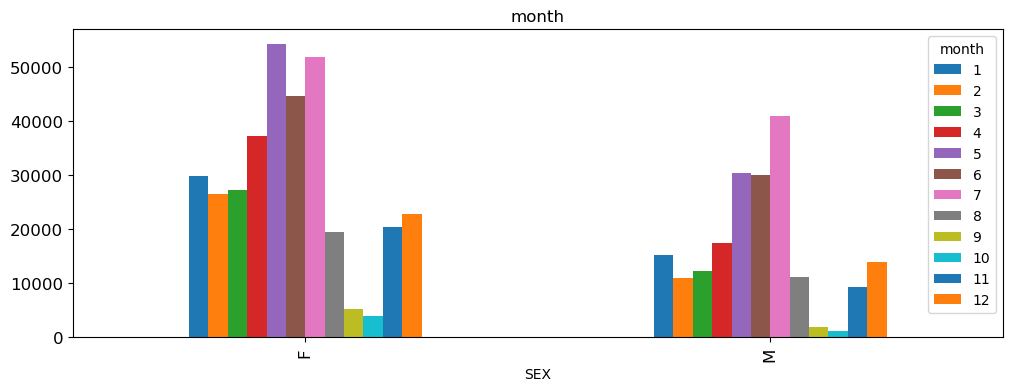

In [21]:
import matplotlib.pyplot as plt


# Windows 한글 폰트 설정
#font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
#mpl.rc('font', family=font_name)
 
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = tmp.plot(kind='bar', title='month', figsize=(12, 4), legend=True, fontsize=12)
#ax.set_xlabel('도시', fontsize=12)          # x축 정보 표시
##ax.set_ylabel('기온/습도', fontsize=12)     # y축 정보 표시
#ax.legend(['기온', '습도'], fontsize=12)    # 범례 지정#
plt.show()

In [22]:
###############################
### 슬라이드 44p
## M,F 를 male, female로 변환
###############################
sex2['changeGender']=['male' if x=='M' else 'female' for x in sex2['SEX']]
sex2['changeGender'].unique()

array(['female', 'male'], dtype=object)

In [23]:
###############################
### 슬라이드 45p
### 성별,월별 구매합 누적 막대 그래프
###############################
# https://continuous-development.tistory.com/153

import seaborn as sns

tmp=sex2.groupby(['month', 'SEX'])['QTY'].sum()
tmp1=tmp.unstack()

tmp1

SEX,F,M
month,,
1,29851,15168
2,26487,11039
3,27142,12254
4,37208,17452
5,54211,30301
6,44600,29998
7,51767,40917
8,19478,11186
9,5168,1870


<AxesSubplot:xlabel='month'>

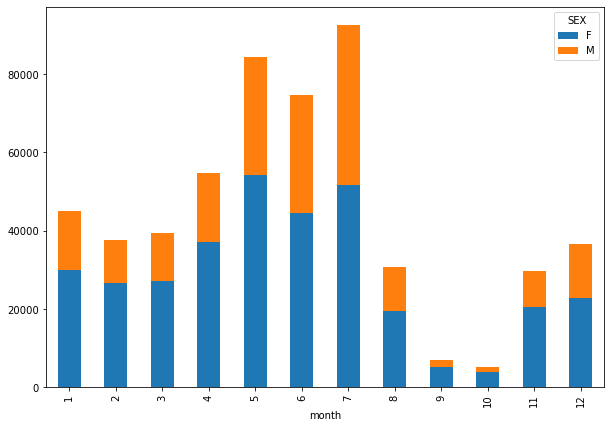

In [24]:
%matplotlib inline
tmp1.plot.bar(stacked=True, figsize=(10,7))


#sns.countplot(x = 'month', hue = 'SEX', dodge=False, data = sex2, palette = 'Set1')
##tmp=sex2.groupby(['SEX', 'month'])['QTY'].sum()
#print(tmp.T)
#sns.countplot(x = 'month', hue = 'SEX', dodge=False, data = sex2, palette = 'Set1')
#(sex2.groupby(['SEX','month'])['month'].sum()).unstack()

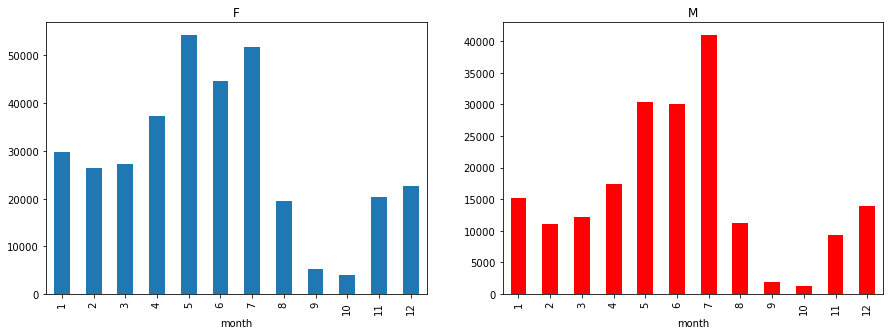

In [25]:
###############################
### 슬라이드 45p
### 성별별 월별 구매 건수 별도의 막대그래로 표시
###############################

fig=plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
tmp2=tmp1.iloc[:,0]
plt.title(tmp1.columns[0])
tmp2.plot.bar()

plt.subplot(1,2,2)
tmp2=tmp1.iloc[:,1]
plt.title(tmp1.columns[1])
tmp2.plot.bar( color='Red')
#tmp2.plot.bar(stacked=True, color='Red')

plt.show()

# colors = ['black','dimgray','dimgrey','darkgray','silver','lightgrey'] 

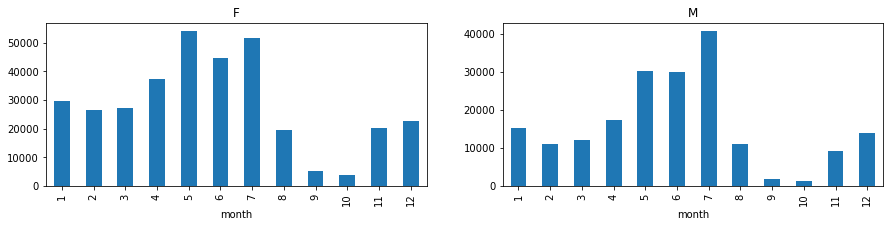

In [26]:
## 위의 내용을 for로 변경함
fig=plt.figure(figsize=(15,3))
cnt=0
for x in tmp1.columns:
    
    cnt=cnt+1
    plt.subplot(1,2,cnt)
    plt.title(x)
    tmp1[x].plot.bar()
    #plt.show()
    #ax.set_title('Training: %i' % x)


In [27]:
###############################
### 슬라이드에 내용 없음
### 연령대에 대한 작업을 진행하기 전 연령대 필드에 대하여 검수
###############################

print(df1.info())
print(df1['AGE'].unique())

print(df1['AGE'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507352 entries, 0 to 507351
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CUST_SERIAL_NO  507352 non-null  int64         
 1   SEX             507352 non-null  object        
 2   AGE             507352 non-null  object        
 3   REG_DATE        507352 non-null  object        
 4   ORDER_DATE      507352 non-null  datetime64[ns]
 5   ORDER_HOUR      507352 non-null  object        
 6   ORDER_WEEKDAY   507352 non-null  object        
 7   IS_WEEKEND      507352 non-null  object        
 8   GOODS_CODE      507352 non-null  int64         
 9   LGROUP          507352 non-null  int64         
 10  MGROUP          507352 non-null  int64         
 11  SGROUP          507352 non-null  int64         
 12  DGROUP          507352 non-null  int64         
 13  GOODS_NAME      507352 non-null  object        
 14  PRICE           507352 non-null  int

In [28]:
###############################
### 슬라이드에 내용 없음
### 연령대에 대한 작업을 진행하기 전 연령대 필드에 대하여 검수
### 문자열로 되어 있는 ' ' 자료 제거
###############################

import re


df1['AGE']=df1['AGE'].astype('int32')
df1['AGE'].value_counts()

50     193968
40     112399
60      96195
30      42022
70      23582
90      16153
100     11880
20       9109
80       2016
10         28
Name: AGE, dtype: int64

In [29]:
###############################
### 슬라이드 46p
### 연령대 구매 건수를 위한 Age 데이터 프레임 생성
###############################
df1.columns
Age1=df1[['ORDER_DATE','AGE','QTY']]
print(Age1.head())


Age1['month']=Age1['ORDER_DATE'].dt.month
Age2=Age1.copy()
Age2.head()

  ORDER_DATE  AGE  QTY
0 2011-11-14   40    1
1 2012-05-28   40    1
2 2012-05-28   40    1
3 2011-08-30   60    1
4 2011-08-30   60    1


,ORDER_DATE,AGE,QTY,month
0,2011-11-14,40,1,11
1,2012-05-28,40,1,5
2,2012-05-28,40,1,5
3,2011-08-30,60,1,8
4,2011-08-30,60,1,8


In [30]:
Age2['AGE'].unique()

array([ 40,  60,  20,  30,  50,  70,  80,  90,  10, 100])

In [35]:
###############################
### 슬라이드 46p
### 연령별 월별 구매 건수를 계산
###############################

tmp=Age2.groupby(['AGE', 'month'])['QTY'].sum()
tmp1=tmp.unstack()

# 10,20,30,40,50 을 10대, 20대, 30대...로 표현
ageName=[str(x) + "대" for x in tmp1.index ]
print(ageName)

tmp1.index=ageName
tmp1

['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100대']


month,1,2,3,4,5,6,7,8,9,10,11,12
10대,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,11.0,50.0
20대,746.0,849.0,768.0,820.0,1229.0,1226.0,1735.0,540.0,131.0,118.0,595.0,735.0
30대,3929.0,3737.0,3708.0,4005.0,5574.0,5751.0,7336.0,2781.0,820.0,586.0,2440.0,3200.0
40대,10127.0,8752.0,9125.0,11520.0,17316.0,15532.0,18810.0,7098.0,2041.0,1545.0,7222.0,8887.0
50대,17580.0,14187.0,14960.0,21341.0,33268.0,27510.0,33338.0,11713.0,2455.0,1885.0,12076.0,14645.0
60대,9092.0,7045.0,7657.0,11589.0,16427.0,13618.0,16935.0,5531.0,1231.0,864.0,5618.0,6809.0
70대,2546.0,1773.0,1943.0,2796.0,4033.0,3361.0,4061.0,1182.0,329.0,161.0,1391.0,1700.0
80대,294.0,175.0,188.0,264.0,384.0,244.0,272.0,56.0,10.0,19.0,121.0,147.0
90대,439.0,655.0,699.0,1969.0,3222.0,4386.0,6211.0,1310.0,17.0,3.0,140.0,239.0
100대,266.0,353.0,348.0,356.0,3059.0,2962.0,3986.0,453.0,4.0,3.0,79.0,170.0


<AxesSubplot:xlabel='month'>

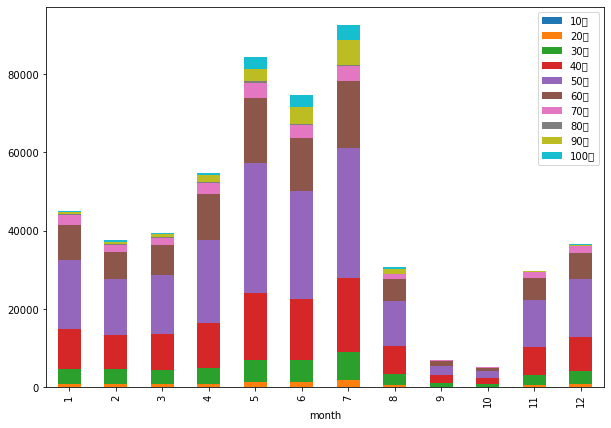

In [36]:
###############################
### 슬라이드 47p
### 연령별 월별 구매 건수를 그래프
###############################

tmp1.T.plot.bar(stacked=True, figsize=(10,7))

end
end
end


<Figure size 21600x720 with 0 Axes>

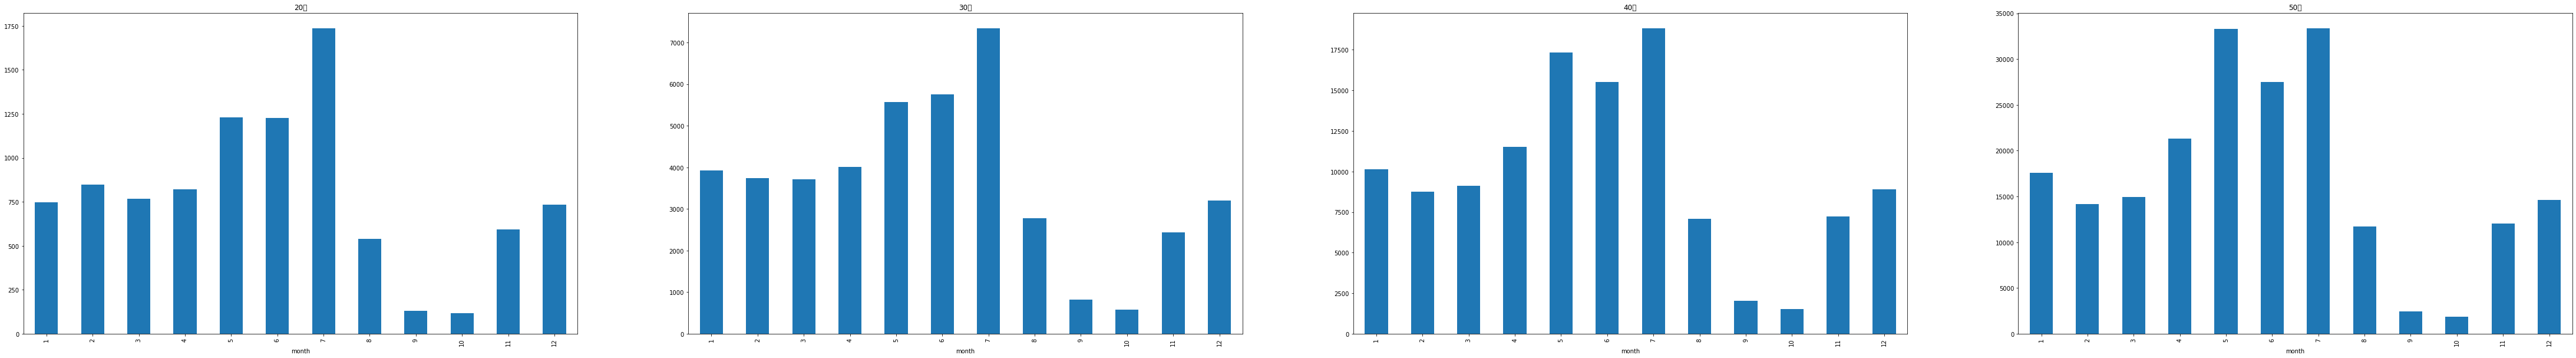

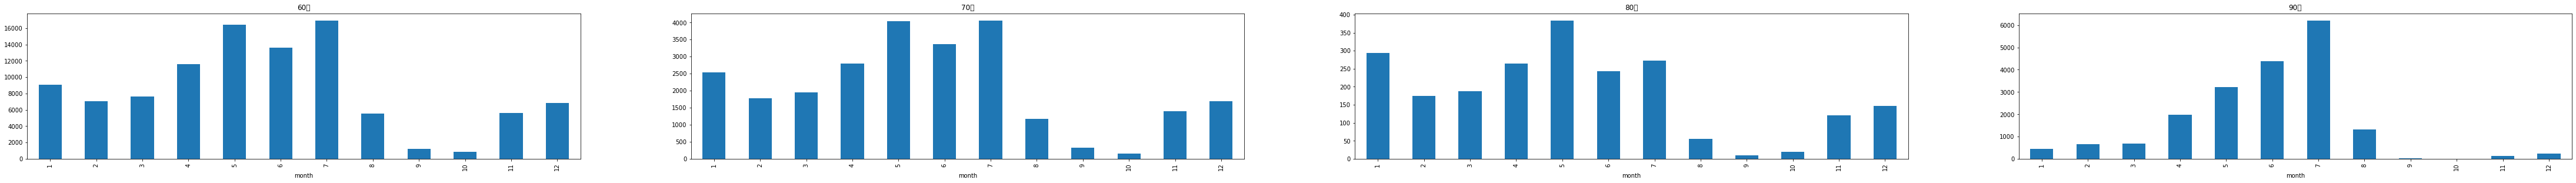

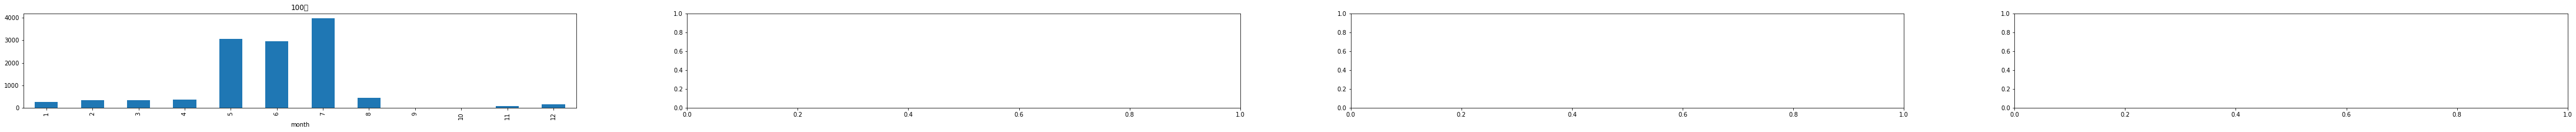

In [39]:
###############################
### 슬라이드 47p
### 연령별 월별 구매 건수를 그래프
###############################

tmp1=tmp1.T


cnt=0

x=tmp1.columns

plt.figure(figsize=(300,10))
for row in range(1,4):
  plt.figure(figsize=(300,10))
  
  for col in range(1,5):
      cnt=cnt+1
      #print(row,15,cnt)
      plt.subplot(row,15,cnt)

      try:
        plt.title(x[cnt])
        tmp1[x[cnt]].plot.bar()
       
      except:
        print('end')
      

In [40]:
###############################
### 슬라이드 48p ,  슬라이드 50p도 같은 내용임
### 성별/연령대 구매건수
###############################

sexage1=df1[['ORDER_DATE','SEX','AGE','QTY']]
sexage1['month']=df1['ORDER_DATE'].dt.month

condition='F'
sexage1Tmp=sexage1[sexage1['SEX']==condition]
sexage2=sexage1Tmp.groupby(['month','SEX','AGE'])['QTY'].sum()
sexage2=sexage2.unstack()

sexage2

,AGE,10,20,30,40,50,60,70,80,90,100
month,SEX,,,,,,,,,,
1,F,NaN,586.0,2898.0,7276.0,12189.0,5407.0,1072.0,90.0,330.0,3.0
2,F,NaN,659.0,2851.0,6649.0,10462.0,4428.0,872.0,53.0,513.0,NaN
3,F,NaN,600.0,2748.0,6596.0,10786.0,4885.0,946.0,60.0,521.0,NaN
4,F,NaN,608.0,2968.0,8692.0,15532.0,7312.0,1261.0,94.0,741.0,NaN
5,F,NaN,907.0,4025.0,12499.0,23688.0,10045.0,1776.0,127.0,1144.0,NaN
6,F,8.0,827.0,3769.0,10591.0,18393.0,7868.0,1369.0,96.0,1662.0,17.0
7,F,NaN,1131.0,4447.0,11851.0,21263.0,8982.0,1570.0,59.0,2462.0,2.0
8,F,NaN,390.0,1746.0,4751.0,8080.0,3333.0,584.0,18.0,575.0,1.0
9,F,NaN,124.0,556.0,1525.0,1841.0,868.0,230.0,10.0,14.0,NaN


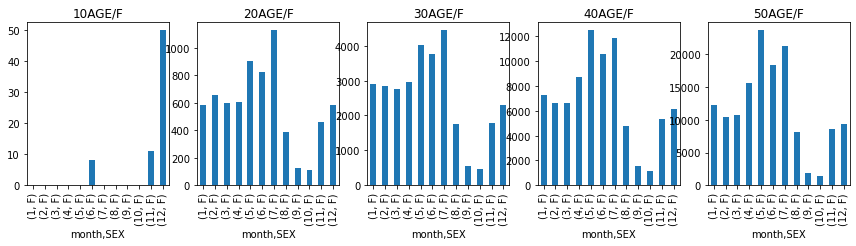

Text(0.5, 1.0, '100AGE/F')

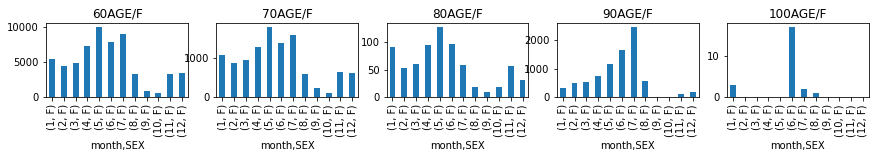

In [41]:
###############################
### 슬라이드 49p ,  슬라이드 51p도 같은 내용임
### 성별/연령대 구매건수 차트
###############################

#### 여자 출력 
x=sexage2.columns

plt.figure(figsize=(30,3))
cnt=1


plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1


plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1

plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1

plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)
cnt+=1

plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1

plt.show()
plt.figure(figsize=(30,3))

plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1


plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)


plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)
cnt+=1

plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1


plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)
cnt+=1

plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)

AGE          20      30      40       50      60      70     80      90   \
month SEX                                                                  
1     M    160.0  1031.0  2851.0   5391.0  3685.0  1474.0  204.0   109.0   
2     M    190.0   886.0  2103.0   3725.0  2617.0   901.0  122.0   142.0   
3     M    168.0   960.0  2529.0   4174.0  2772.0   997.0  128.0   178.0   
4     M    212.0  1037.0  2828.0   5809.0  4277.0  1535.0  170.0  1228.0   
5     M    322.0  1549.0  4817.0   9580.0  6382.0  2257.0  257.0  2078.0   
6     M    399.0  1982.0  4941.0   9117.0  5750.0  1992.0  148.0  2724.0   
7     M    604.0  2889.0  6959.0  12075.0  7953.0  2491.0  213.0  3749.0   
8     M    150.0  1035.0  2347.0   3633.0  2198.0   598.0   38.0   735.0   
9     M      7.0   264.0   516.0    614.0   363.0    99.0    NaN     3.0   
10    M      7.0   127.0   392.0    445.0   198.0    63.0    NaN     NaN   
11    M    135.0   649.0  1860.0   3480.0  2287.0   766.0   65.0    25.0   
12    M    1

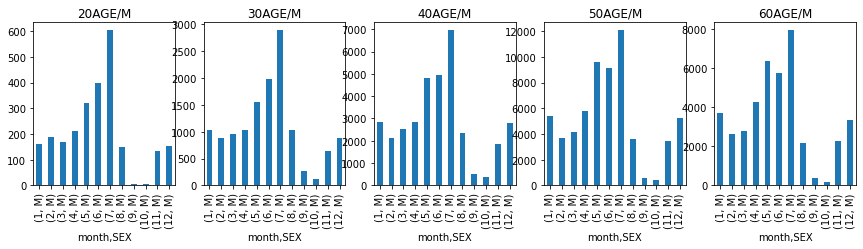

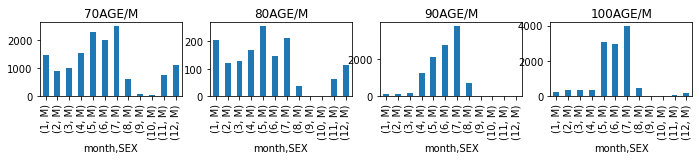

In [42]:
### 남자출력
###############################
### 슬라이드 49p ,  슬라이드 51p도 같은 내용임
### 성별/연령대 구매건수 차트
###############################


condition='M'
sexage1Tmp=sexage1[sexage1['SEX']=='M']
sexage2=sexage1Tmp.groupby(['month','SEX','AGE'])['QTY'].sum()
sexage2=sexage2.unstack()

print(sexage2)

x=sexage2.columns

#### 여자 출력 
x=sexage2.columns

plt.figure(figsize=(30,3))
cnt=1


plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1


plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1

plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1

plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)
cnt+=1

plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1

plt.show()
plt.figure(figsize=(30,3))

plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1


plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)


plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)
cnt+=1

plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1


plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)
cnt+=1

In [43]:
###############################
### 슬라이드 52p 
### 월별 고객단위 구매금액
############################

In [44]:
cust1=df1[['ORDER_DATE','CUST_SERIAL_NO','PRICE']]
cust1['month']=cust1['ORDER_DATE'].dt.month
cust2=cust1
cust2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507352 entries, 0 to 507351
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ORDER_DATE      507352 non-null  datetime64[ns]
 1   CUST_SERIAL_NO  507352 non-null  int64         
 2   PRICE           507352 non-null  int64         
 3   month           507352 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 19.4 MB


In [45]:
df2=cust2.groupby(['CUST_SERIAL_NO','month'])['PRICE'].sum()
df2=df2.unstack()
df2.columns=[str(x)+'월' for x in df2.columns]
df2=df2.T
df2

CUST_SERIAL_NO,1000000001,1000000002,1000000004,1000000005,1000000006,1000000007,1000000008,1000000010,1000000011,1000000012,...,1000419400,1000419401,1000419402,1000419403,1000419404,1000419405,1000419406,1000419409,1000419413,1000419414
1월,431900.0,300800.0,NaN,NaN,NaN,NaN,49500.0,NaN,NaN,15400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2월,NaN,154400.0,NaN,NaN,NaN,NaN,138300.0,NaN,63400.0,53300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3월,300200.0,280420.0,NaN,NaN,NaN,NaN,54500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4월,167900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5월,259700.0,117300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6월,NaN,173400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7월,315000.0,900520.0,943000.0,493300.0,566100.0,33300.0,452400.0,1634500.0,406900.0,1861700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8월,1576800.0,1058800.0,132500.0,NaN,63500.0,713000.0,1099600.0,NaN,69400.0,331800.0,...,120900.0,43300.0,43300.0,43300.0,43300.0,0.0,43300.0,43300.0,86600.0,152500.0
9월,156500.0,629500.0,NaN,NaN,24300.0,887100.0,206000.0,63400.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10월,443100.0,429500.0,NaN,NaN,NaN,NaN,204000.0,243000.0,432500.0,355900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


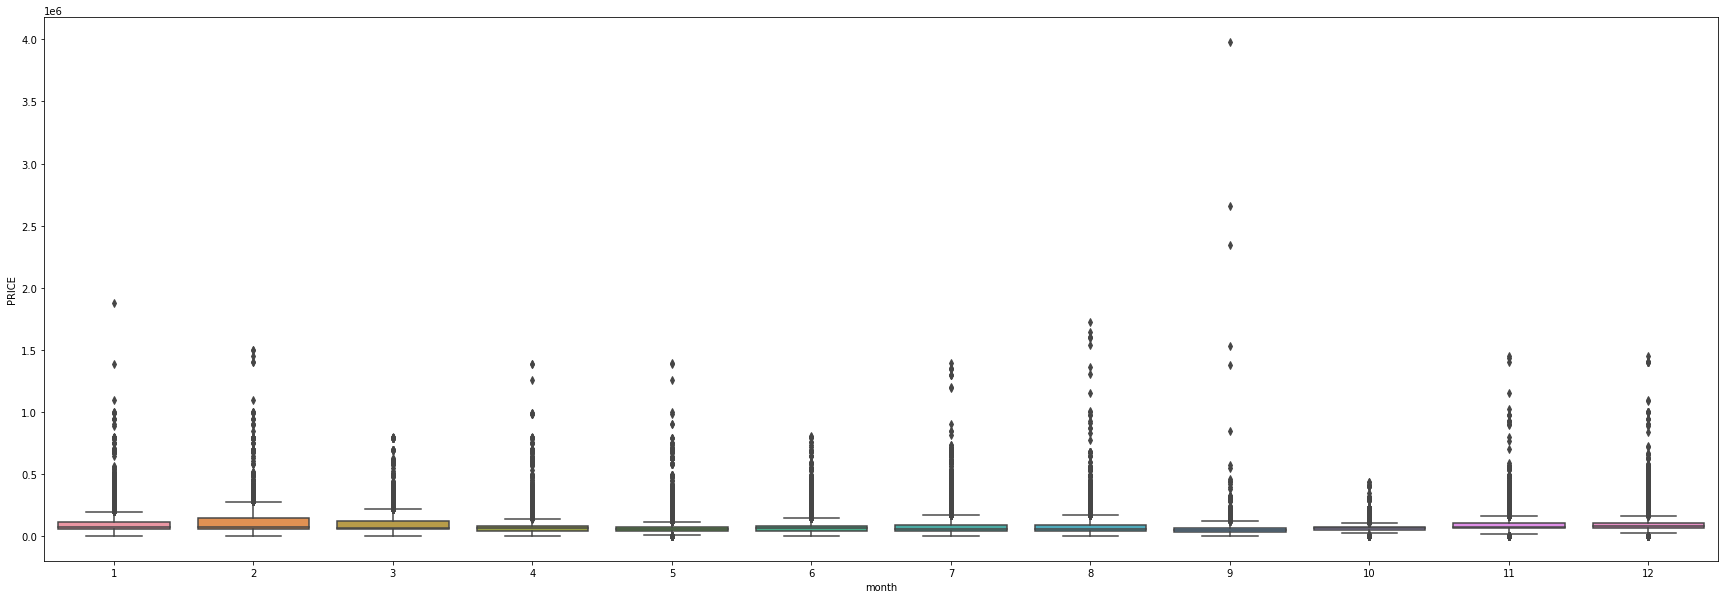

In [46]:
###############################
### 슬라이드 53p 
### 월별 구매금액 boxplot
############################
plt.figure(figsize=(30,10))
sns.boxplot(x="month", y="PRICE", data=cust2)
plt.show()

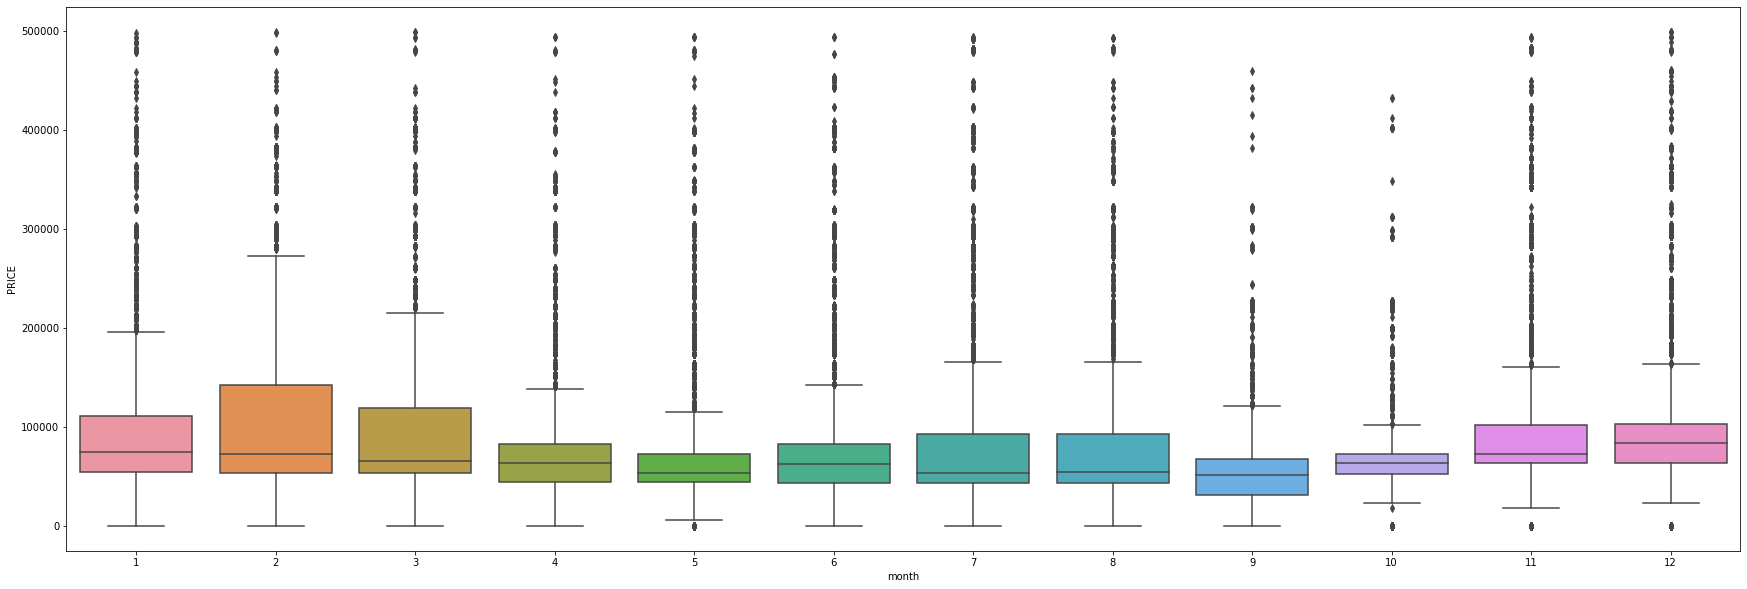

In [47]:
###############################
### 슬라이드 54p 
### 월별 구매금액이 50만원 미만인 자료만 boxplot
############################

cust4=cust2[cust2['PRICE']<500000]
plt.figure(figsize=(30,10))
sns.boxplot(x="month", y="PRICE", data=cust4)
plt.show()

In [48]:
###############################
### 슬라이드 55p 
### 요일별 작업
############################


cust1['weekday']=cust1['ORDER_DATE'].dt.day_name()
day1=cust1
day1

,ORDER_DATE,CUST_SERIAL_NO,PRICE,month,weekday
0,2011-11-14,1000000023,61500,11,Monday
1,2012-05-28,1000000023,42500,5,Monday
2,2012-05-28,1000000023,42500,5,Monday
3,2011-08-30,1000000014,53400,8,Tuesday
4,2011-08-30,1000000014,33400,8,Tuesday
...,...,...,...,...,...
507347,2012-08-07,1000416297,0,8,Tuesday
507348,2012-08-07,1000416219,0,8,Tuesday
507349,2012-08-07,1000416327,0,8,Tuesday
507350,2012-08-07,1000416225,0,8,Tuesday


In [49]:
###############################
### 슬라이드 55p 
### 요일별 구매금액 sum
############################

In [50]:
###############################
### 슬라이드 56p 
### 요일별 구매금액(PRICE) sum 차트
############################

In [51]:
###############################
### 슬라이드 57p 
### 요일별 구매수량(QTY) 합 및 boxplot
############################

In [52]:
###############################
### 슬라이드 58p 
### 그룹별 구매 패턴 분석
### 전체 고객의 구매수량 상위 100개의 세분류 상품을 하기 위해 상품코드이름이 있는 파일과 조인하기 위해 
### 조인할 상품코드 제작
############################

dgroup1=df1[['LGROUP','MGROUP','SGROUP','DGROUP','QTY']]
print(dgroup1.head())

dgroup1['LMSD_ICODE']=[str(x1)+str(x2)+str(x3)+str(x4) for x1,x2,x3,x4 in zip(df1['LGROUP'],df['MGROUP'],df['SGROUP'],df['DGROUP'])]
dgroup1

   LGROUP  MGROUP  SGROUP  DGROUP  QTY
0      20       2       1       1    1
1      10      10       3       1    1
2      10      10       1       1    1
3      70       2       1       4    1
4      70       2       1      11    1


,LGROUP,MGROUP,SGROUP,DGROUP,QTY,LMSD_ICODE
0,20,2,1,1,1,20211
1,10,10,3,1,1,101031
2,10,10,1,1,1,101011
3,70,2,1,4,1,70214
4,70,2,1,11,1,702111
...,...,...,...,...,...,...
507347,85,4,4,13,1,854413
507348,85,4,4,13,1,854413
507349,85,4,4,13,1,854413
507350,85,4,4,13,1,854413


In [54]:
# 고쳐야함

# vhd=pd.read_csv('VHD_GOODSKIND.csv')
# vhd.head()

# vhd['LMSD_ICODE']=[str(x1)+str(x2)+str(x3)+str(x4) for x1,x2,x3,x4 in zip(vhd['LGROUP'],vhd['MGROUP'],vhd['SGROUP'],vhd['DGROUP'])]
# vhd.head()

In [56]:
###############################
### 슬라이드 59p 
### 그룹별 구매 패턴 분석
### 전체 고객의 구매수량 상위 100개의 세분류 상품을 하기 위해 상품코드이름이 있는 파일과 조인하기 위해 
### 조인할 상품코드 제작
############################

# 두자료 같은 코드로 조인
# dgroup2=pd.merge(dgroup1, vhd, on='LMSD_ICODE')
# dgroup2.info()

In [57]:
###################
## 슬라이드 60p
## 연관성 분석
######################
# 자료 'CUST_ORDER_OUTPUT2.utf8.csv' 읽고
df=pd.read_csv('data/21.09.27(연관분석)/CUST_ORDER_OUTPUT2.utf8.csv')
# *자료 지우고
df1=df[df['SEX']!='*']
# AGE에 있는 '10', '20' 등 str자료를 숫자형으로 변경
df1['AGE']=df1['AGE'].astype('int32')
# ORDER_DATE 형식을 날짜 형식으로 변경한 df1을
df1['ORDER_DATE'] =pd.to_datetime(df1['ORDER_DATE'])



df1['month']=df1['ORDER_DATE'].dt.month
df1['weekday']=df1['ORDER_DATE'].dt.day_name()

analDf=df1[(df1.LGROUP==10) | (df1.LGROUP==20)]
analDf['ID']=[str(x1)+'_'+str(x2)+'_'+ x3 for x1,x2,x3 in zip(analDf['CUST_SERIAL_NO'],analDf['month'],analDf['weekday'])]

analDf['LMSD_ICODE']=[str(x1) +'|'+ str(x2)+ '|'+str(x3) +'|'+ str(x4)  \
 for x1,x2,x3,x4 in zip(analDf['LGROUP'],analDf['MGROUP'],analDf['SGROUP'],analDf['DGROUP'])]

In [59]:
vhd=pd.read_csv('data/21.09.27(연관분석)/VHD_GOODSKIND.csv')
vhd['LMSD_ICODE']=[str(x1) +'|'+ str(x2)+ '|'+str(x3) +'|'+ str(x4)  \
 for x1,x2,x3,x4 in zip(vhd['LGROUP'],vhd['MGROUP'],vhd['SGROUP'],vhd['DGROUP'])]

In [60]:
analDf=pd.merge(analDf,vhd) # LMSD_ICODE로 조인

In [61]:
result_analDf=analDf[['ID','DGROUP_NAME']]
result_analDf

,ID,DGROUP_NAME
0,1000000023_11_Monday,남성세트
1,1000007629_11_Monday,남성세트
2,1000026402_11_Thursday,남성세트
3,1000026419_11_Thursday,남성세트
4,1000026432_11_Thursday,남성세트
...,...,...
143102,1000263980_5_Friday,여성용
143103,1000000037_5_Friday,여성용
143104,1000000037_5_Sunday,여성용
143105,1000000037_5_Sunday,여성용


In [62]:
len(result_analDf['ID'].unique())

134698

In [63]:
result_analDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143107 entries, 0 to 143106
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           143107 non-null  object
 1   DGROUP_NAME  143107 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB
